# **Regularization**

## **Example**

Let’s say we want to build a linear regression model to predict the house prices based on some features, such as the number of rooms, the size of the house, the location, etc. We have a training dataset of 100 houses with their features and prices, and we want to use gradient descent to find the optimal weights for our model.

However, we notice that our model is overfitting the training data, meaning that it has a very low training error but a high test error when we evaluate it on new data. This means that our model is too complex and it learns the noise in the training data instead of the general patterns.

To prevent overfitting, we can use regularization techniques such as L2 or L1 regularization. These techniques add a penalty term to the loss function that depends on the magnitude of the weights. The penalty term makes the model prefer smaller weights and reduces the complexity of the model.

For example, if we use L2 regularization, our loss function becomes:

$$
L = \frac{1}{2n} \sum{i=1}^n(y_i - \hat{y_i})^2 + \lambda \sum_{j=1}^m w_j^2
$$

where:

- L is the loss function with L2 regularization.
- n is the number of training examples.
- yi​ is the true price of the i-th house.
- y^​i​ is the predicted price of the i-th house.
- λ is the regularization parameter that controls the strength of the regularization.
- m is the number of features.
- wj​ is the weight of the j-th feature

The first term in the loss function is the mean squared error (MSE) that measures how well our model fits the data. The second term is the L2 regularization term that penalizes large weights and makes them shrink towards zero. The regularization parameter λ determines how much we want to regularize our model. A larger λ means more regularization and less overfitting, but also more bias and less variance. A smaller λ means less regularization and more overfitting, but also less bias and more variance.

By using regularization, we can improve the performance of our model on new data and avoid overfitting. We can also use other regularization techniques such as L1 or elastic net for different effects and trade-offs

## **Formula for some Regression Models**

**Logistic Regression**

Logistic regression is a type of binary classification model that predicts the probability of an example belonging to a positive class. The output function of logistic regression is:

$$
\hat{y} = \sigma(Wx + b)
$$

where:

- $\hat{y}$ is the predicted probability of the positive class.
- $\sigma$ is the sigmoid function that maps any real number to a value between 0 and 1.
- $W$ is the weight matrix of the model.
- $x$ is the input vector of features.
- $b$ is the bias vector of the model.

The loss function of logistic regression without regularization is:

$$
L = - \frac{1}{n} \sum_{i=1}^n [y_i \log(\hat{y}_i) + (1 - y_i) \log(1 - \hat{y}_i)]
$$

where:

- $L$ is the loss function without regularization.
- $n$ is the number of training examples.
- $y_i$ is the true label of the i-th example (0 or 1).
- $\hat{y}_i$ is the predicted probability of the i-th example.

The loss function of logistic regression with L2 regularization is:

$$
L = - \frac{1}{n} \sum_{i=1}^n [y_i \log(\hat{y}_i) + (1 - y_i) \log(1 - \hat{y}_i)] + \lambda \sum_{j=1}^m w_j^2
$$

where:

- $L$ is the loss function with L2 regularization.
- $\lambda$ is the regularization parameter that controls the strength of the regularization.
- $m$ is the number of features.
- $w_j$ is the weight of the j-th feature.


**Softmax Regression**

Softmax regression is a type of multiclass classification model that predicts the probability of an example belonging to one of K classes. The output function of softmax regression is:

$$
\hat{y}_k = \frac{\exp(W_k x + b_k)}{\sum_{j=1}^K \exp(W_j x + b_j)}
$$

where:

- $\hat{y}_k$ is the predicted probability of the k-th class.
- $W_k$ is the weight vector of the k-th class.
- $x$ is the input vector of features.
- $b_k$ is the bias term of the k-th class.
- $K$ is the number of classes.

The loss function of softmax regression without regularization is:

$$
L = - \frac{1}{n} \sum_{i=1}^n \sum_{k=1}^K y_{ik} \log(\hat{y}_{ik})
$$

where:

- $L$ is the loss function without regularization.
- $n$ is the number of training examples.
- $y_{ik}$ is the true label of the i-th example for the k-th class (0 or 1).
- $\hat{y}_{ik}$ is the predicted probability of the i-th example for the k-th class.

The loss function of softmax regression with L2 regularization is:

$$
L = - \frac{1}{n} \sum_{i=1}^n \sum_{k=1}^K y_{ik} \log(\hat{y}_{ik}) + \lambda \sum_{k=1}^K \sum_{j=1}^m w_{kj}^2
$$

where:

- $L$ is the loss function with L2 regularization.
- $\lambda$ is the regularization parameter that controls the strength of the regularization.
- $m$ is the number of features.
- $w_{kj}$ is the weight of the j-th feature for the k-th class.

## **Code Example**

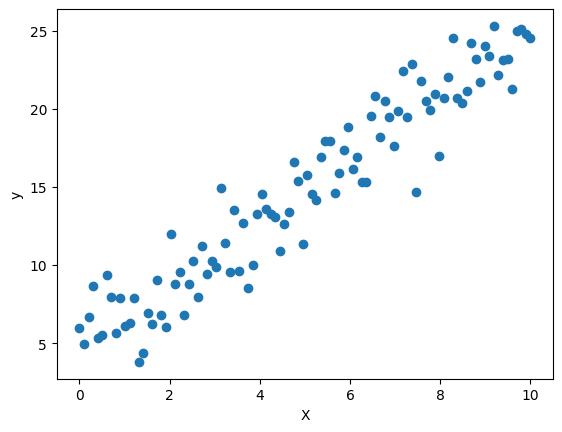

In [39]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_squared_error

# Set random seed for reproducibility
np.random.seed(42)

# Generate synthetic data
X = np.linspace(0, 10, 100) # 100 points between 0 and 10
y = 2 * X + 5 + np.random.normal(0, 2, 100) # Linear function with some noise

# Plot the data
plt.scatter(X, y)
plt.xlabel("X")
plt.ylabel("y")
plt.show()

In [40]:
# Split the data into training and test sets
X_train = X[:80].reshape(-1, 1) # First 80 points as training set
y_train = y[:80]
X_test = X[80:].reshape(-1, 1) # Last 20 points as test set
y_test = y[80:]
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((80, 1), (80,), (20, 1), (20,))

MSE of simple linear regression: 1.827


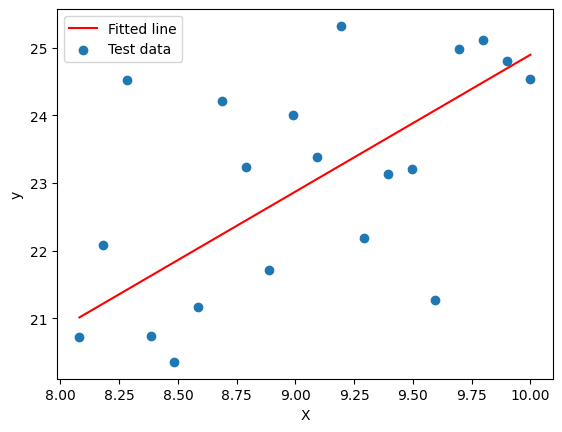

In [41]:
# Fit a simple linear regression model
lr = LinearRegression()
lr.fit(X_train, y_train)

# Predict on the test data
y_pred = lr.predict(X_test)

# Compute the mean squared error on the test data
mse = mean_squared_error(y_test, y_pred)
print(f"MSE of simple linear regression: {mse:.3f}")

# Plot the fitted line and the test data
plt.plot(X_test, y_pred, color="red", label="Fitted line")
plt.scatter(X_test, y_test, label="Test data")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()

In [42]:
class Linear_Regression:
  def fit(self, X, y):
    one = np.ones((X.shape[0], 1))
    Xbar = np.concatenate((one, X), axis = 1)
    A = np.dot(Xbar.T, Xbar)
    b = np.dot(Xbar.T, y)
    self.w = np.dot(np.linalg.pinv(A), b)

  def predict(self, X):
    one = np.ones((X.shape[0], 1))
    Xbar = np.concatenate((one, X), axis = 1)
    return Xbar @ self.w

  def score(self, y_test_pred, y_test):
    SS_res = sum((y_test - y_test_pred)**2)
    y_mean = y_test.mean()
    SS_tot = sum((y_test - y_mean)**2)
    R_2 = 1 - (SS_res / SS_tot)
    return R_2

  def mse(self, y_test_pred, y_test):
    mse = np.sum((y_test_pred.flatten() - y_test)**2) / y_test.shape[0]
    return mse

model = Linear_Regression()
model.fit(X_train, y_train)
y_test_pred = model.predict(X_test)
print(model.mse(y_test_pred,y_test))

1.8272227899308


We can see that the simple linear regression model fits the data reasonably well and has a low mean squared error on the test data.

However, what if we try to fit a more complex model, such as a polynomial regression model with degree 10? Let’s see what happens:

MSE of polynomial regression: 89948.250


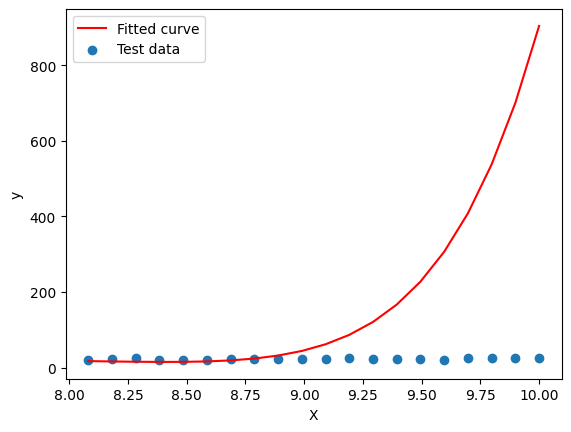

In [43]:
# Create polynomial features of degree 10
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=10)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Fit a polynomial regression model
pr = LinearRegression()
pr.fit(X_train_poly, y_train)

# Predict on the test data
y_pred_poly = pr.predict(X_test_poly)

# Compute the mean squared error on the test data
mse_poly = mean_squared_error(y_test, y_pred_poly)
print(f"MSE of polynomial regression: {mse_poly:.3f}")

# Plot the fitted curve and the test data
plt.plot(X_test, y_pred_poly, color="red", label="Fitted curve")
plt.scatter(X_test, y_test, label="Test data")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()

We can see that the polynomial regression model overfits the training data and has a high mean squared error on the test data. The fitted curve is too wiggly and does not capture the general trend of the data.

To prevent overfitting, we can use regularization techniques such as L2 regularization (also known as ridge regression). L2 regularization adds a penalty term to the loss function that is proportional to the sum of the squares of the weights. This penalty term makes the model prefer smaller weights and reduces the complexity of the model.

MSE of polynomial regression with L2 regularization: 1999.116


c:\Users\MTT\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=2.24142e-21): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


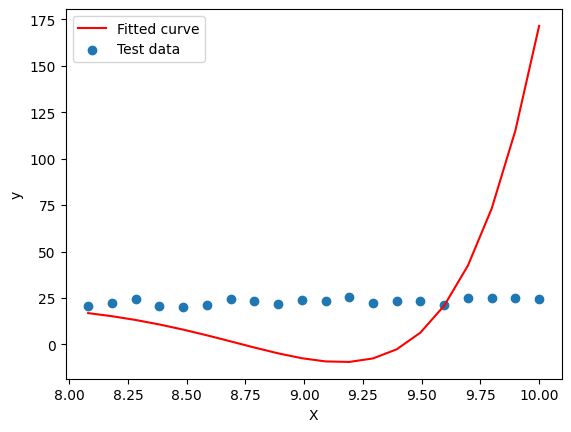

In [44]:
# Fit a polynomial regression model with L2 regularization (ridge regression)
rr = Ridge(alpha=0.01) # alpha is the regularization parameter (lambda)
rr.fit(X_train_poly, y_train)

# Predict on the test data
y_pred_ridge = rr.predict(X_test_poly)

# Compute the mean squared error on the test data
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
print(f"MSE of polynomial regression with L2 regularization: {mse_ridge:.3f}")

# Plot the fitted curve and the test data
plt.plot(X_test, y_pred_ridge, color="red", label="Fitted curve")
plt.scatter(X_test, y_test, label="Test data")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()

MSE of polynomial regression with L2 regularization: 4.021

We can see that the polynomial regression model with L2 regularization fits the data better than the one without regularization and has a lower mean squared error on the test data. The fitted curve is smoother and more generalizable than the one without regularization.